<a href="https://colab.research.google.com/github/MoudiAlhazzaa/-Dataset-Selection-and-Neural-Network-Experimentation/blob/main/Task6_T5_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import Perceptron
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers


# Load and read the dataset

In [3]:
df = pd.read_csv('/content/obesity_level.csv')

# Explore the dataset

* Gender
* Age
* Height
* Weight
* Family_history_with_overweight
* FAVC (Frequent consumption of high-caloric food)
* FCVC (Frequency of consumption of vegetables)
* NCP (Number of main meals)
* CAEC (Consumption of food between meals)
* SMOKE
* CH2O (Daily water consumption)
* SCC (Caloric beverages consumption)
* FAF (Physical activity frequency)
* TUE (Time spent using technological devices)
* CALC (Consumption of alcohol)
* MTRANS (Mode of transportation)
* 0be1dad (Target variable representing obesity level)

In [4]:
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


In [5]:
df.shape

(20758, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

In [8]:
df.drop(columns=["id"],inplace=True)

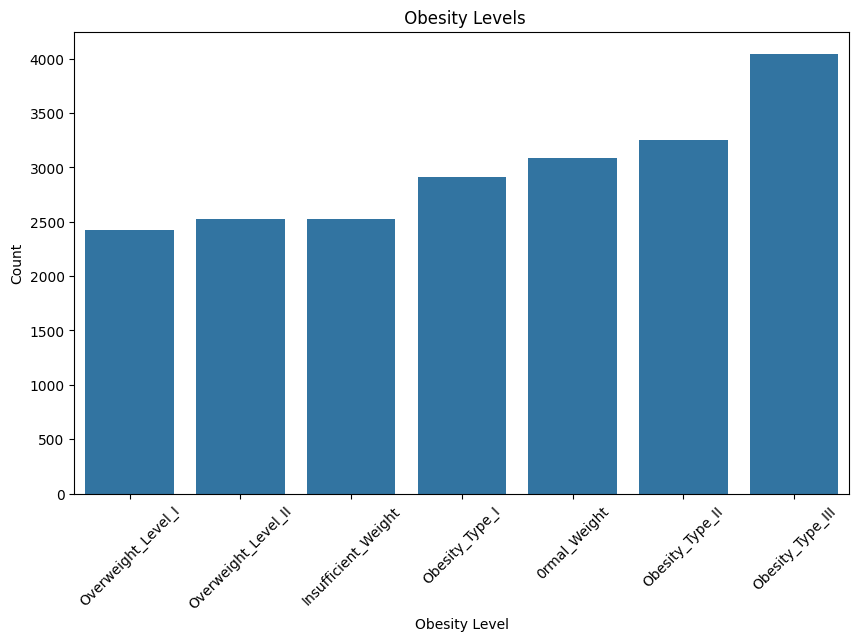

In [22]:
df.rename(columns={"0be1dad": "obesity_level"}, inplace=True)
sorted_data = df['obesity_level'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
sns.countplot(x="obesity_level", data=df, order=sorted_data.index)
plt.xticks(rotation=45)
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title(' Obesity Levels')

plt.show()

In [51]:
df['obesity_level'].value_counts()

obesity_level
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

# Split the columns to numerical and categorical

In [10]:
catg_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

print('The Categorical columns: ', catg_cols)
print('__________________________________________________________________________')
print('The Numerical Columns: ', num_cols)

The Categorical columns:  Index(['Gender', 'CAEC', 'CALC', 'MTRANS', 'obesity_level'], dtype='object')
__________________________________________________________________________
The Numerical Columns:  Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE'],
      dtype='object')


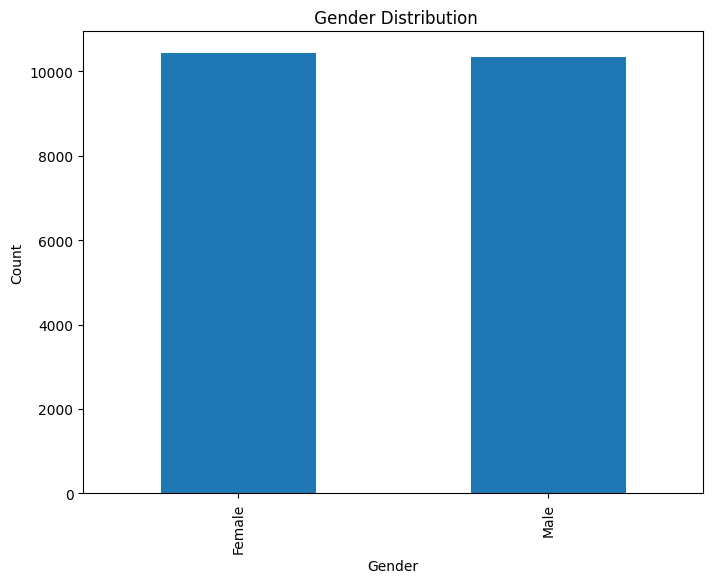

In [20]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title(' Gender Distribution')

plt.show()

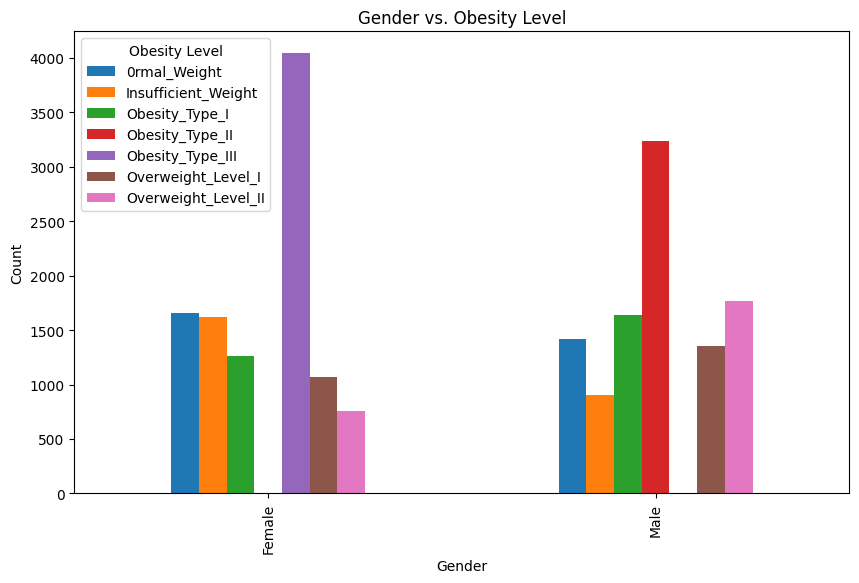

In [21]:
grouped_data = df.groupby(['Gender', 'obesity_level']).size().unstack()

grouped_data.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Obesity Level')
plt.legend(title='Obesity Level')

plt.show()

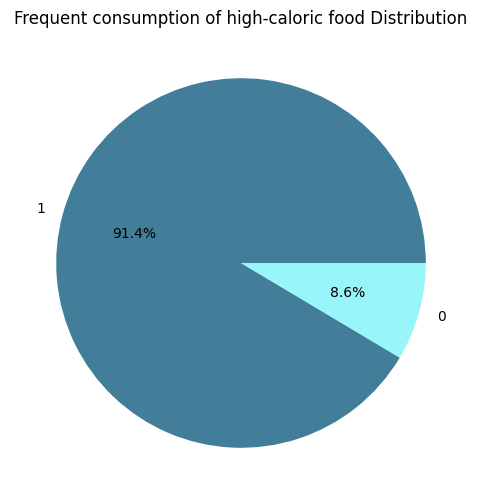

In [47]:

family_history_counts = df['FAVC'].value_counts()

custom_colors = ['#427D9A', '#98F5F9', '#99FF99']

plt.figure(figsize=(10, 6))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', colors=custom_colors)

plt.title('Frequent consumption of high-caloric food Distribution')

plt.show()

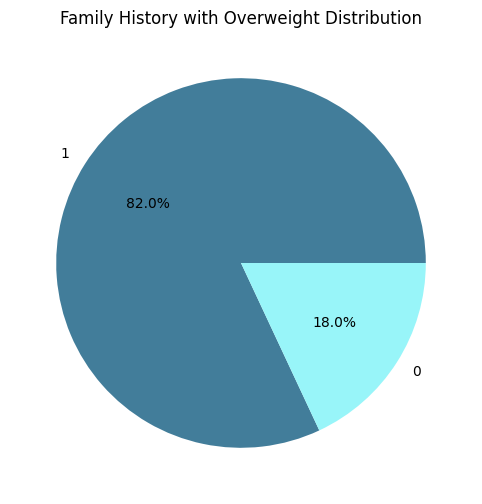

In [46]:
family_history_counts = df['family_history_with_overweight'].value_counts()

# Define custom colors
custom_colors = ['#427D9A', '#98F5F9', '#99FF99']

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', colors=custom_colors)

# Customize the chart
plt.title('Family History with Overweight Distribution')

# Display the chart
plt.show()

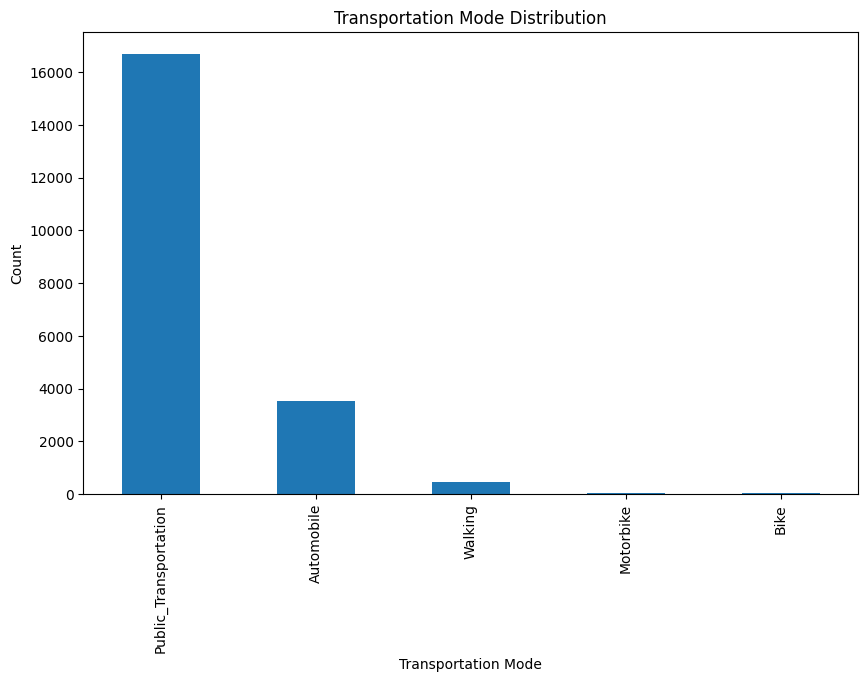

In [30]:
mtrans_counts = df['MTRANS'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
mtrans_counts.plot(kind='bar')

# Customize the chart
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.title('Transportation Mode Distribution')

# Display the chart
plt.show()

In [48]:
num_cols = df.describe().columns
df.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [49]:
df.describe(include ='object')

,Gender,CAEC,CALC,MTRANS,obesity_level
count,20758,20758,20758,20758,20758
unique,2,4,3,5,7
top,Female,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17529,15066,16687,4046


# check null values

In [ ]:
df[catg_cols].isna().sum()

In [ ]:
df[num_cols].isna().sum()

# Numerical Data Preprocessing

# Scalling MinMax

In [56]:
scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
0,0.222192,0.475586,0.338497,1.0,1.0,0.500000,0.661099,0.0,0.881787,0.0,0.000000,0.488237
1,0.085106,0.209260,0.142792,1.0,1.0,0.500000,0.666667,0.0,0.500000,0.0,0.333333,0.500000
2,0.085106,0.497391,0.088577,1.0,1.0,0.440267,0.137228,0.0,0.455189,0.0,0.288682,0.836792
3,0.147931,0.496002,0.732007,1.0,1.0,1.000000,0.666667,0.0,0.337031,0.0,0.489288,0.390099
4,0.375342,0.883049,0.434708,1.0,1.0,0.839832,0.323824,0.0,0.489924,0.0,0.655991,0.465861
...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.236959,0.602336,0.596452,1.0,1.0,0.959792,0.666667,0.0,0.575905,0.0,0.443506,0.098340
20754,0.085106,0.494613,0.087262,0.0,1.0,1.000000,1.000000,0.0,0.000000,0.0,0.666667,0.500000
20755,0.129809,0.703030,0.528177,1.0,1.0,0.703909,0.666667,0.0,0.500000,0.0,0.386013,0.599220
20756,0.422403,0.475590,0.353174,1.0,1.0,0.835619,0.323824,0.0,0.572419,0.0,0.000000,0.486917


# Categorical Data Preprocessing

# Mapping

In [53]:
type_weights_map = {  # the mapping to replace for ordinal encoding
   1: 'Insufficient_Weight',
   2: '0rmal_Weight',
   3: 'Overweight_Level_I',
   4: 'Overweight_Level_II',
   5: 'Obesity_Type_I',
   6: 'Obesity_Type_II',
   7: 'Obesity_Type_III'
}

df['obesity_level'] = df['obesity_level'].map(type_weights_map) # apply the mapping

# Label encoder

In [62]:
le = LabelEncoder()
for column in ['CAEC', 'CALC', 'MTRANS', 'obesity_level']:
    df[column] = le.fit_transform(df[column])
le

LabelEncoder()

# One hot encoder

In [63]:
df_encoded = pd.get_dummies(df, columns=['Gender'], dtype=int)
df_encoded

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity_level,Gender_Female,Gender_Male
0,0.222192,0.475586,0.338497,1.0,1.0,0.500000,0.661099,3,0.0,0.881787,0.0,0.000000,0.488237,2,3,0,0,1
1,0.085106,0.209260,0.142792,1.0,1.0,0.500000,0.666667,2,0.0,0.500000,0.0,0.333333,0.500000,0,0,0,1,0
2,0.085106,0.497391,0.088577,1.0,1.0,0.440267,0.137228,3,0.0,0.455189,0.0,0.288682,0.836792,0,3,0,1,0
3,0.147931,0.496002,0.732007,1.0,1.0,1.000000,0.666667,3,0.0,0.337031,0.0,0.489288,0.390099,2,3,0,1,0
4,0.375342,0.883049,0.434708,1.0,1.0,0.839832,0.323824,3,0.0,0.489924,0.0,0.655991,0.465861,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.236959,0.602336,0.596452,1.0,1.0,0.959792,0.666667,3,0.0,0.575905,0.0,0.443506,0.098340,2,3,0,0,1
20754,0.085106,0.494613,0.087262,0.0,1.0,1.000000,1.000000,2,0.0,0.000000,0.0,0.666667,0.500000,2,3,0,0,1
20755,0.129809,0.703030,0.528177,1.0,1.0,0.703909,0.666667,3,0.0,0.500000,0.0,0.386013,0.599220,0,3,0,0,1
20756,0.422403,0.475590,0.353174,1.0,1.0,0.835619,0.323824,3,0.0,0.572419,0.0,0.000000,0.486917,0,0,0,0,1


In [64]:
X = df[['family_history_with_overweight', 'Age', 'Height', 'Weight', 'FAVC', 'NCP', 'SCC', 'SMOKE']]
y = df[['obesity_level']]

# Split tha data

In [67]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [111]:
model = keras.Sequential()
#model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dense(8, activation="softmax"))


In [113]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#history = model.fit(X_train, y_train,
#epochs=5,validation_data=(X_val, y_val))

history = model.fit(X_train_scaled, y_train, epochs= 5 , validation_data=(X_valid_scaled, y_val))

Epoch 1/5
416/416 [==============================] - 5s 10ms/step - loss: 1.5677e-08 - accuracy: 1.0000 - val_loss: 1.1483e-09 - val_accuracy: 1.0000
Epoch 2/5
416/416 [==============================] - 4s 9ms/step - loss: 7.6278e-10 - accuracy: 1.0000 - val_loss: 3.5885e-10 - val_accuracy: 1.0000
Epoch 3/5
416/416 [==============================] - 5s 12ms/step - loss: 2.4230e-10 - accuracy: 1.0000 - val_loss: 1.0765e-10 - val_accuracy: 1.0000
Epoch 4/5
416/416 [==============================] - 4s 9ms/step - loss: 8.9739e-11 - accuracy: 1.0000 - val_loss: 3.5885e-11 - val_accuracy: 1.0000
Epoch 5/5
416/416 [==============================] - 4s 9ms/step - loss: 4.4869e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
